In [1]:
import numpy as np

from QuICT.core.gate import *
from QuICT.algorithm.quantum_algorithm.random_walk import RandomWalk, Graph
from QuICT.simulation.state_vector import ConstantStateVectorSimulator

In [2]:
import matplotlib.pyplot as plt

def plot(data, size):
    data = [data[i] + data[i+1] for i in range(0, size*2, 2)]
    for i in range(size):
        plt.bar(i, data[i])

In [3]:
def classical_random_walk(size: int):
    position = [0] * size
    step = 0
    while step < size ** 3:
        related_prob = [0] * size
        for i in range(size):
            if position[i] != 0:
                add_idx = 0 if i == size - 1 else i + 1
                red_idx = size - 1 if i == 0 else i - 1
                related_prob[add_idx] += position[i]/2
                related_prob[red_idx] += position[i]/2

        if step == 0:
            position[0] = 1
        else:
            position = related_prob[:]

        break_point = True
        for prob in position:
            if not np.isclose(prob, 1/size):
                break_point = False
                break

        if break_point:
            break

        step += 1

    return position, step

In [4]:
print(classical_random_walk(11))

([0.0909081747562393, 0.09090996995131473, 0.09090832019226788, 0.09090969086161968, 0.09090871032544212, 0.09090922129123578, 0.09090922129123578, 0.09090871032544212, 0.09090969086161968, 0.09090832019226788, 0.09090996995131473], 295)


In [5]:
def circular_graph_generator(size):
    vertices = size
    edges = {}
    for i in range(size):
        addi = i + 1 if i != size - 1 else 0
        subi = i - 1 if i != 0 else size - 1
        edges[i] = [addi, subi]
    
    return Graph(vertices, edges)

In [6]:
# Build Circular Graph with different coin by vertices
vertices = 5
edges = {0: [4, 1], 1: [0, 2], 2: [1, 3], 3: [2, 4], 4: [3, 0]}
coin_operators = [H.matrix, H.matrix, U2.matrix, U1.matrix, H.matrix]
graph_circular = Graph(vertices, edges, coin_operators)

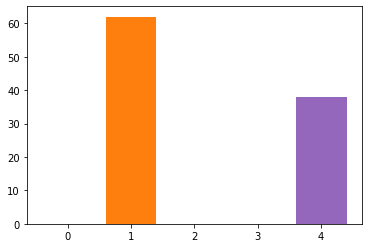

In [7]:
vertices = 5
graph_circular = circular_graph_generator(vertices)
# Quantum Walk Algorithm
rw = RandomWalk(
    step=1,
    graph=graph_circular,
    coin_operator=H.matrix
)

rw_cir = rw.circuit

sim = ConstantStateVectorSimulator()
state = rw.run(sim, record_runtime_measured=True, shots = 100)

plot(state, vertices)